Downloads and analyses a single 8 page pdf [doc](https://wikileaks.org/imf-internal-20160319/transcript/IMF%20Anticipates%20Greek%20Disaster.pdf). The steps below are generic enough (except ina  few cases) and will work for most text corpora of any domain.

**Key Notes** (read before going ahead):
 - Text analysis requires manual intervention in the initial stages. Once an algorithm is set for your data set, a facility to assess accuracy, false +ve, false -ve must be put in place.
 -  There will always be noise in every text. You must make a judicious judgement for your data set and the problem you are trying to solve whether it has to be retained or not. For e.g., removing a single syllable word or something like 'as', 'a' etc. may adversely affect your analyses. Try with different options before settling on something that starts making sense.
 -A lot of refinement (manual) may be needed in the initial stages till the algorithm matures. This is especially true of text where you may have unwanted terms in certain cases. Refine judiciously.
 - Preprocessing text is not always useful. For e.g. removing punctuations, normalize for lemmas etc may alter the meaning and linkages of your original text and may not give you the correct analysis. Again, understand your data set and problem statement before making decisions.
 - Visualize at every stage but ensure that your visualization is usable.
 - Entity recognition is still an evolving science and you may need to augment it via other mechanisms (e.g. add your own via lookups etc).
 - It is always very helpful to have relevant domain experts with you when doing this. E.g. a medical professional when analysing medical corpora, a intelligence analysis when looking into intelligence reports. They will add meaning and refinement to your algorithms. I cannot stress this enough. Once your algorithms have evolved enough, they may not always be needed but feedback for each output is mandatory.
 -  While I haven't shown training below, ensure that you train the model you use for your corpora. This will benefit in numerous ways (entity recognition, dependency parsing, semantics etc).
 - In the initial stages, do experiment with various algorithms to compare and contrast the output. This helps in arriving at the optimal choices for your problem statement.

## Installations & configurations

In [1]:
!pip install spacy
!python -m spacy download en_core_web_lg

!pip install textacy

!pip install networkx

!pip install PyPDF2

✔ Download and installation successful
You can now load the model via spacy.load('en_core_web_lg')


In [2]:
!pip install python-Levenshtein
!pip install fuzzywuzzy

In [3]:
!spacy validate

✔ Loaded compatibility table

====================== Installed models (spaCy v2.1.4) ======================
ℹ spaCy installation: /usr/local/lib/python3.6/dist-packages/spacy

TYPE      NAME             MODEL            VERSION                            
package   en-core-web-sm   en_core_web_sm   2.1.0   ✔
package   en-core-web-lg   en_core_web_lg   2.1.0   ✔
link      en               en_core_web_sm   2.1.0   ✔



In [0]:
import spacy
nlp = spacy.load('en_core_web_lg')

import PyPDF2 as pypdf
import textacy
import networkx as nx
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np

# Download data

In [5]:
!pwd && ls

/content
sample_data


In [0]:
!mkdir data

In [7]:
cd data

/content/data


In [8]:
!wget https://wikileaks.org/imf-internal-20160319/transcript/IMF%20Anticipates%20Greek%20Disaster.pdf

--2019-06-15 03:31:17--  https://wikileaks.org/imf-internal-20160319/transcript/IMF%20Anticipates%20Greek%20Disaster.pdf
Resolving wikileaks.org (wikileaks.org)... 195.35.109.53, 95.211.113.131, 95.211.113.154, ...
Connecting to wikileaks.org (wikileaks.org)|195.35.109.53|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [application/pdf]
Saving to: ‘IMF Anticipates Greek Disaster.pdf’

IMF Anticipates Gre     [    <=>             ]   1.13M  1.65MB/s    in 0.7s    

2019-06-15 03:31:18 (1.65 MB/s) - ‘IMF Anticipates Greek Disaster.pdf’ saved [1188173]



In [9]:
!ls -l

total 1164
-rw-r--r-- 1 root root 1188173 Apr  2  2016 'IMF Anticipates Greek Disaster.pdf'


# Load Data (get pdf as text)

In [0]:
mypdf = open('IMF Anticipates Greek Disaster.pdf', mode='rb')

In [11]:
pdfdoc = pypdf.PdfFileReader(mypdf)
pdfPages = pdfdoc.numPages
print(pdfPages)

8


In [12]:
text=''
for i in range(0,pdfPages):
  pagetxt = pdfdoc.getPage(i)
  print("--------------Page No: ", i, " :===>\n",pagetxt.extractText())
  text += pagetxt.extractText()
  
text.replace('\n', ' ')

--------------Page No:  0  :===>
 19 March 2016 IMF Teleconference on Greece
WikiLeaks release:  April, 2
nd
 2016
Keywords
:IMF, European Union, Greece, debt relief, Troika, Brexit, 
Merkel, Sarkozy
Title
:Transcript of an Audio Recording of an internal IMF meeting
Date
:March, 19
th
 2016
Link
:https://wikileaks.org/imf-internal-20160319
Pages
:7
Description
The IMF would like to put debt relief for Greece on the Troika-agenda. However, IMF officials are 
worriedthattheEUisgoingtobeparalyzedinthefirsthalfof2016becauseoftheloomingBrexit
so that no decision is going to be made as to Greece.
IMF Europe director 
Thomsen
 wants to pressure 
Merkel
 and reiterate to her that IMF leavingthe 
Troika is going to look bad and is going to lead to discomforting questions in the Bundestag.
Thomsen
 connects the debt relief question loosely to the refugee question. He talks about the 
refugees and then says that the IMF will at the same time (—we at the time sayﬁ) come in with their 
demands and 

'19 March 2016 IMF Teleconference on Greece WikiLeaks release:  April, 2 nd  2016 Keywords :IMF, European Union, Greece, debt relief, Troika, Brexit,  Merkel, Sarkozy Title :Transcript of an Audio Recording of an internal IMF meeting Date :March, 19 th  2016 Link :https://wikileaks.org/imf-internal-20160319 Pages :7 Description The IMF would like to put debt relief for Greece on the Troika-agenda. However, IMF officials are  worriedthattheEUisgoingtobeparalyzedinthefirsthalfof2016becauseoftheloomingBrexit so that no decision is going to be made as to Greece. IMF Europe director  Thomsen  wants to pressure  Merkel  and reiterate to her that IMF leavingthe  Troika is going to look bad and is going to lead to discomforting questions in the Bundestag. Thomsen  connects the debt relief question loosely to the refugee question. He talks about the  refugees and then says that the IMF will at the same time (—we at the time sayﬁ) come in with their  demands and approach  Merkel  with the debt r

In [13]:
print(text)

19 March 2016 IMF Teleconference on Greece
WikiLeaks release:  April, 2
nd
 2016
Keywords
:IMF, European Union, Greece, debt relief, Troika, Brexit, 
Merkel, Sarkozy
Title
:Transcript of an Audio Recording of an internal IMF meeting
Date
:March, 19
th
 2016
Link
:https://wikileaks.org/imf-internal-20160319
Pages
:7
Description
The IMF would like to put debt relief for Greece on the Troika-agenda. However, IMF officials are 
worriedthattheEUisgoingtobeparalyzedinthefirsthalfof2016becauseoftheloomingBrexit
so that no decision is going to be made as to Greece.
IMF Europe director 
Thomsen
 wants to pressure 
Merkel
 and reiterate to her that IMF leavingthe 
Troika is going to look bad and is going to lead to discomforting questions in the Bundestag.
Thomsen
 connects the debt relief question loosely to the refugee question. He talks about the 
refugees and then says that the IMF will at the same time (—we at the time sayﬁ) come in with their 
demands and approach 
Merkel
 with the debt re

# Analysis based on NLP and Graph theory

In [0]:
## The Force Atlas 2 layout function. Not mine, taken from here - https://github.com/tpoisot/nxfa2. All credit to the original author!

def forceatlas2_layout(G, iterations=10, linlog=False, pos=None, nohubs=False,
                       kr=0.001, k=None, dim=2):
    """
    Options values are
    g                The graph to layout
    iterations       Number of iterations to do
    linlog           Whether to use linear or log repulsion
    random_init      Start with a random position
                     If false, start with FR
    avoidoverlap     Whether to avoid overlap of points
    degreebased      Degree based repulsion
    """
    # We add attributes to store the current and previous convergence speed
    for n in G:
        G.node[n]['prevcs'] = 0
        G.node[n]['currcs'] = 0
        # To numpy matrix
    # This comes from the spares FR layout in nx
    A = nx.to_scipy_sparse_matrix(G, dtype='f')
    nnodes, _ = A.shape

    try:
        A = A.tolil()
    except Exception as e:
        A = (coo_matrix(A)).tolil()
    if pos is None:
        pos = np.asarray(np.random.random((nnodes, dim)), dtype=A.dtype)
    else:
        pos = pos.astype(A.dtype)
    if k is None:
        k = np.sqrt(1.0 / nnodes)
        # Iterations
    # the initial "temperature" is about .1 of domain area (=1x1)
    # this is the largest step allowed in the dynamics.
    t = 0.1
    # simple cooling scheme.
    # linearly step down by dt on each iteration so last iteration is size dt.
    dt = t / float(iterations + 1)
    displacement = np.zeros((dim, nnodes))
    for iteration in range(iterations):
        displacement *= 0
        # loop over rows
        for i in range(A.shape[0]):
            # difference between this row's node position and all others
            delta = (pos[i] - pos).T
            # distance between points
            distance = np.sqrt((delta ** 2).sum(axis=0))
            # enforce minimum distance of 0.01
            distance = np.where(distance < 0.01, 0.01, distance)
            # the adjacency matrix row
            Ai = np.asarray(A.getrowview(i).toarray())
            # displacement "force"
            Dist = k * k / distance ** 2
            if nohubs:
                Dist = Dist / float(Ai.sum(axis=1) + 1)
            if linlog:
                Dist = np.log(Dist + 1)
            displacement[:, i] += \
                (delta * (Dist - Ai * distance / k)).sum(axis=1)
            # update positions
        length = np.sqrt((displacement ** 2).sum(axis=0))
        length = np.where(length < 0.01, 0.01, length)
        pos += (displacement * t / length).T
        # cool temperature
        t -= dt
        # Return the layout
    return dict(zip(G, pos))

19 2016 2 19 2016 20160319 7 19 2016 19 811 two weeks ten days next day tomorrow 2 5 2nd 12th or the 13th 6th and 7th following week about april 15th or 16th middle of the week of the 11th 8th 9th 12th 3 5 1 5 two two minute year 0 0 5 0 5 zero 25 first 30th of this month up to 3 5 1 5 2 5 2 5 1 5 2 5 one two only one month one mid april end of the day 2 5 march imf teleconference greece wikileaks release april nd 2016 keywords imf european union greece debt relief troika brexit merkel sarkozy title transcript audio recording internal imf meeting date march th link https wikileaks org imf internal pages description imf like debt relief greece troika agenda imf officials worriedthattheeuisgoingtobeparalyzedinthefirsthalfof2016becauseoftheloomingbrexit decision going greece imf europe director thomsen wants pressure merkel reiterate imf leavingthe troika going look bad going lead discomforting questions bundestag thomsen connects debt relief question loosely refugee question talks refuge

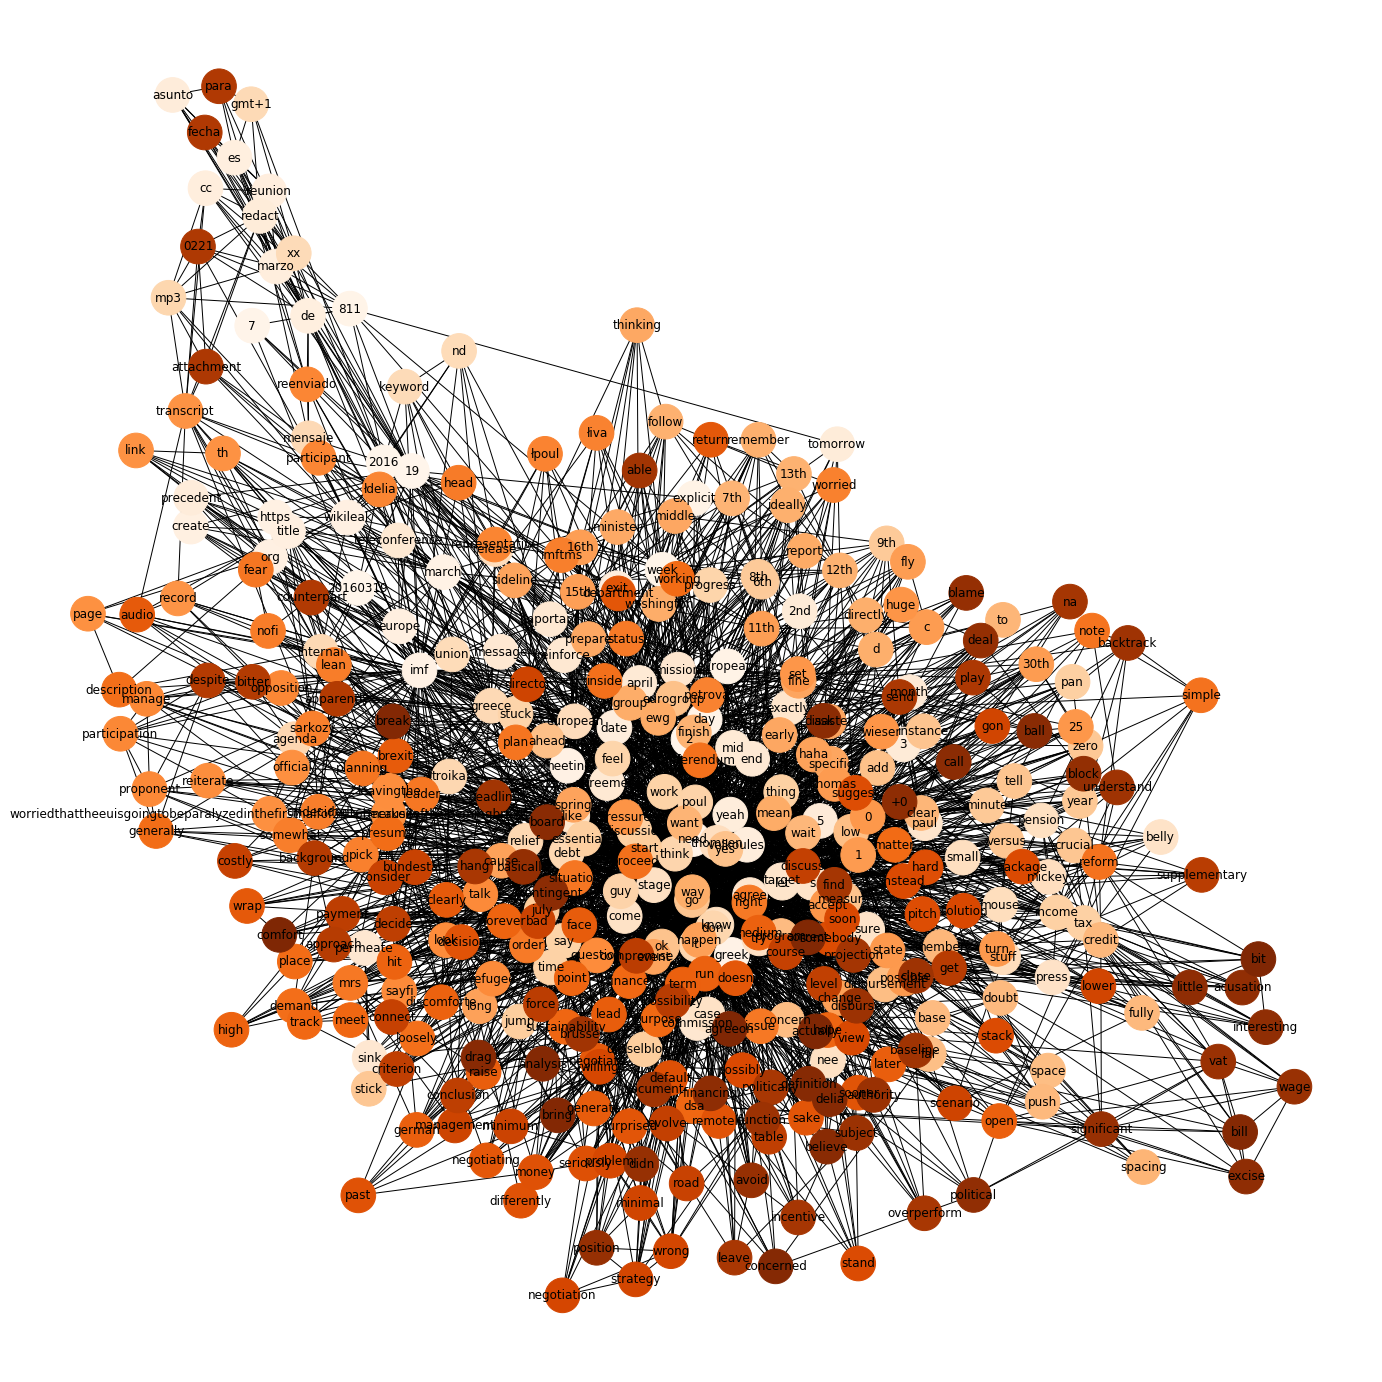

In [15]:
textpro = textacy.preprocess.preprocess_text(text, fix_unicode=False, lowercase=True, no_urls=False, no_emails=False, no_phone_numbers=False,
                                                  no_numbers=False, no_currency_symbols=False, no_punct=True, no_contractions=False, no_accents=True)

tdocxpro = textacy.make_spacy_doc(textpro, lang='en')

gobj = (textacy.spacier.doc_extensions.to_terms_list(tdocxpro, ngrams=(1, 2, 3), entities=True, normalize=False, as_strings=True, filter_stops=True))

textnewpro = ''
ix=0
for str in gobj:
    textnewpro += str
    textnewpro += ' '
    ix=ix+1
  
print(textnewpro)
tdocx2newpro = textacy.make_spacy_doc(textnewpro,lang='en')

terms=[]
   
for token in tdocx2newpro:
  if(token.is_stop==False):
    terms.append(textacy.spacier.utils.get_normalized_text(token))

print(terms)

gxTerms = textacy.network.terms_to_semantic_network(terms, normalize='lemma', window_width=5, edge_weighting='cooc_freq')

plt.figure(110,(19,19))
pos1 = forceatlas2_layout(gxTerms, linlog=False, nohubs=False,iterations=100)
nx.draw(gxTerms, pos1,with_labels=True)
nx.draw_networkx_nodes(gxTerms,pos1,nodelist=nx.nodes(gxTerms),node_color=range(404), 
                       node_size=1200,cmap=plt.cm.Oranges,alpha=1)
plt.show()

In [16]:
print("\nSorted edges, max wt 1st (Coocfreq W=5):\n ",sorted(gxTerms.edges(data=True),key= lambda x: x[2]['weight'],reverse=True))
l5 = sorted(gxTerms.edges(data=True))
print(len(l5))


Sorted edges, max wt 1st (Coocfreq W=5):
  [('don', 't', {'weight': 314}), ('know', 't', {'weight': 190}), ('debt', 'relief', {'weight': 184}), ('velkouleskou', 'right', {'weight': 168}), ('know', 'don', {'weight': 128}), ('velkouleskou', 'yeah', {'weight': 127}), ('xx', 'xx', {'weight': 114}), ('s', 'right', {'weight': 107}), ('redact', 'redact', {'weight': 101}), ('let', 's', {'weight': 101}), ('t', 't', {'weight': 99}), ('velkouleskou', 's', {'weight': 93}), ('de', 'marzo', {'weight': 88}), ('velkouleskou', 'thomsen', {'weight': 84}), ('s', 'thomsen', {'weight': 84}), ('velkouleskou', 'go', {'weight': 73}), ('velkouleskou', 'velkouleskou', {'weight': 73}), ('de', 'de', {'weight': 72}), ('right', 'right', {'weight': 70}), ('5', '1', {'weight': 69}), ('income', 'tax', {'weight': 67}), ('5', '0', {'weight': 64}), ('thomsen', 'right', {'weight': 64}), ('2', '5', {'weight': 62}), ('de', 'redact', {'weight': 62}), ('thomsen', 'go', {'weight': 60}), ('tax', 'credit', {'weight': 60}), ('20

True
True

<===: Graph general info :===> Name: 
Type: Graph
Number of nodes: 404
Number of edges: 4299
Average degree:  21.2822

<===: Degree Histogram :===>
 [0, 0, 0, 0, 0, 4, 3, 17, 54, 28, 30, 22, 32, 23, 15, 19, 15, 4, 6, 7, 10, 9, 6, 10, 7, 6, 5, 3, 3, 3, 1, 1, 3, 3, 4, 0, 1, 2, 1, 0, 3, 2, 0, 2, 1, 1, 0, 1, 0, 3, 2, 1, 1, 2, 0, 0, 1, 1, 0, 0, 2, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2]

<===: Sorted Degree Histogram :===>
 [54, 32, 30, 28, 23, 22, 19, 17, 15, 15, 10, 10, 9, 7, 7, 6, 6, 6, 5, 4, 4, 4, 3, 3, 3, 3, 3, 3, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,

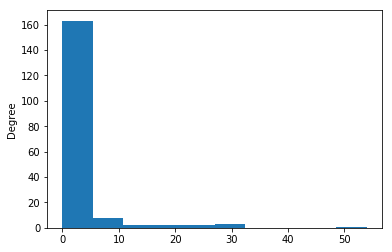

In [17]:
print(nx.is_connected(gxTerms))
print(nx.is_biconnected(gxTerms))
print("\n<===: Graph general info :===>",nx.info(gxTerms))
deghist = nx.degree_histogram(gxTerms)
print("\n<===: Degree Histogram :===>\n", deghist)
print("\n<===: Sorted Degree Histogram :===>\n", sorted(deghist,reverse=True))

plt.hist(deghist, density=False)
plt.ylabel('Degree')
plt.show()

From the above, we have node with deg 9 as maximum. Most nodes are in range of degrees from 9 , 11 and 13. We are of course ignoring nodes with degree 0-5 for this statement...

In [18]:
node_deg = dict(nx.degree(gxTerms))
print(node_deg)
sorted_nodedeg = [(k, node_deg[k]) for k in sorted(node_deg, key=node_deg.get, reverse=True)]
print(sorted_nodedeg)

top5nodes_by_deg = []
top5nodes_by_deg.append(sorted_nodedeg[0])
top5nodes_by_deg.append(sorted_nodedeg[1])
top5nodes_by_deg.append(sorted_nodedeg[2])
top5nodes_by_deg.append(sorted_nodedeg[3])
top5nodes_by_deg.append(sorted_nodedeg[4])

print(top5nodes_by_deg)

dfTopNodeDeg = pd.DataFrame(top5nodes_by_deg)
print("\nTop 5 by Degree:=> \n",dfTopNodeDeg)

{'19': 34, '2': 57, '2016': 28, '20160319': 12, '7': 5, '811': 14, 'week': 38, 'day': 47, 'europeans': 15, 'explicit': 8, 'greek': 53, 'need': 99, 'march': 28, 'imf': 90, 'meeting': 71, 'https': 11, 'wikileak': 26, 'org': 12, 'create': 11, 'europe': 19, 'title': 19, 'de': 18, 'es': 11, 'reunion': 9, 'marzo': 15, 'cc': 9, 'date': 51, 'exit': 12, 'velkouleskou': 180, 'yeah': 77, 'precedent': 11, 'asunto': 7, 'redact': 21, 'tomorrow': 7, '5': 94, '2nd': 14, '3': 32, 'month': 20, 'mid': 17, 'april': 70, 'end': 32, 'teleconference': 16, 'agreement': 49, 'important': 8, 'message': 9, 'reinforce': 10, 'permeate': 7, 'sink': 7, 'commission': 53, 'agree': 88, 'mission': 49, 'target': 60, 'paul': 14, 'exactly': 19, 'let': 43, 'like': 69, 's': 114, 'belly': 8, 'sure': 23, 'press': 18, 'case': 21, 'come': 81, 'nee': 22, 'try': 32, 'stage': 24, 'know': 97, 'pension': 20, 'small': 20, 'thomsen': 180, 'mickey': 16, 'mouse': 18, 'stuff': 14, 'release': 12, 'european': 87, 'union': 12, 'nd': 8, 'keywor

## What entities are available in this document?

For entities, we shall use the original text. Text post preprocessing suffers from loss of information in some cases and this is one such case. Getting entities from our original text is not going to affect any of our subsequent operations. Even in the below o/p, you will notice missed entities and false positives...we need to clean all that up to get a solid entity list. Most of our analysis is based on having a solid, dependable entity list...

In [19]:
from spacy import displacy

doc007 = nlp(text)
displacy.render(doc007, style="ent", jupyter=True)

Typically, we would add these entities to spacy's doc based entity list. But in this particular scenario we do not need spacy's entity based analysis for further processing. So we take the easy way out and just add the missing entities to our entity list.

In [20]:
myentities=[]

for ent in doc007.ents:
    # USE FOR DEBUG ONLY print(ent.text, ent.start_char, ent.end_char, ent.label_)
    if(ent.label_ == "ORG" or ent.label_ == "PERSON" or ent.label_=="LOC" or ent.label_=="GPE" or ent.label_=="NORP" or ent.label_=="FAC" or ent.label_=="PRODUCT" or ent.label_=="EVENT"):
      ntt={}
      ntt['name'] = ent.text
      ntt['type'] = ent.label_
      myentities.append(ntt)
      
print("Customized raw entity list: ", myentities)

Customized raw entity list:  [{'name': 'Greece', 'type': 'GPE'}, {'name': 'WikiLeaks', 'type': 'ORG'}, {'name': 'European Union', 'type': 'ORG'}, {'name': 'Greece', 'type': 'GPE'}, {'name': 'Troika', 'type': 'ORG'}, {'name': 'Brexit', 'type': 'GPE'}, {'name': 'Merkel', 'type': 'PERSON'}, {'name': 'Sarkozy\n', 'type': 'PERSON'}, {'name': 'Greece', 'type': 'GPE'}, {'name': 'Greece', 'type': 'GPE'}, {'name': 'IMF Europe', 'type': 'ORG'}, {'name': 'Thomsen', 'type': 'PERSON'}, {'name': 'Merkel\n ', 'type': 'PERSON'}, {'name': 'Bundestag', 'type': 'GPE'}, {'name': 'Thomsen', 'type': 'PERSON'}, {'name': 'Merkel\n ', 'type': 'PERSON'}, {'name': 'Merkel', 'type': 'PERSON'}, {'name': 'Troika', 'type': 'ORG'}, {'name': 'European', 'type': 'NORP'}, {'name': 'Sarkozy', 'type': 'PERSON'}, {'name': 'Greece', 'type': 'GPE'}, {'name': 'European', 'type': 'NORP'}, {'name': 'Europe', 'type': 'LOC'}, {'name': 'Greece', 'type': 'GPE'}, {'name': 'Mensaje', 'type': 'PERSON'}, {'name': 'Asunto', 'type': 'PER

In [21]:
nttnamelist = []

for e in myentities:
  nttnamelist.append(e['name'])

print(nttnamelist)

['Greece', 'WikiLeaks', 'European Union', 'Greece', 'Troika', 'Brexit', 'Merkel', 'Sarkozy\n', 'Greece', 'Greece', 'IMF Europe', 'Thomsen', 'Merkel\n ', 'Bundestag', 'Thomsen', 'Merkel\n ', 'Merkel', 'Troika', 'European', 'Sarkozy', 'Greece', 'European', 'Europe', 'Greece', 'Mensaje', 'Asunto', 'WikiLeaks', 'ŁDELIA', 'Greece', 'ŁPOUL', 'THOMSEN\n', 'IMF', 'European Department', 'ŁIVA', 'PETROVA\n', 'THOMSEN', 'Troika', 'Poul', 'THOMSEN', 'Europeans', 'THOMSEN', 'Brussels', 'Poul', 'THOMSEN', 'THOMSEN', 'Poul', 'THOMSEN', 'PETROVA', 'Poul', 'the \nCommission', 'THOMSEN', 'Washington Group', 'EWG', 'Eurogroup Working Group', 'THOMSEN', 'EWG', 'Eurogroup Working Group', 'THOMSEN', 'D.C.', 'THOMSEN', 'Greek', 'THOMSEN', 'THOMSEN', 'Europeans', 'the\nCommission', 'THOMSEN', 'THOMSEN', 'THOMSEN', 'THOMSEN', 'THOMSEN', 'Thomas Wieser', 'THOMSEN', 'EWG', 'EWG', 'Greece', 'Thomas', 'THOMSEN', 'EWG', 'Europeans', 'Commission', 'THOMSEN', 'Paul THOMSEN', 'THOMSEN', 'Delia', 'THOMSEN', 'THOMSEN', 

In [22]:
#strip trailing characters
cleanedentities = []
for ent in nttnamelist:
  ent = ent.rstrip()
  ent = ent.lstrip()
  cleanedentities.append(ent)
  
#strip nulls
cleanedentities2 = []
for item in cleanedentities:
  if (item != ""):
    cleanedentities2.append(item)
    
print("cleaned entity list: ", cleanedentities2)

cleaned entity list:  ['Greece', 'WikiLeaks', 'European Union', 'Greece', 'Troika', 'Brexit', 'Merkel', 'Sarkozy', 'Greece', 'Greece', 'IMF Europe', 'Thomsen', 'Merkel', 'Bundestag', 'Thomsen', 'Merkel', 'Merkel', 'Troika', 'European', 'Sarkozy', 'Greece', 'European', 'Europe', 'Greece', 'Mensaje', 'Asunto', 'WikiLeaks', 'ŁDELIA', 'Greece', 'ŁPOUL', 'THOMSEN', 'IMF', 'European Department', 'ŁIVA', 'PETROVA', 'THOMSEN', 'Troika', 'Poul', 'THOMSEN', 'Europeans', 'THOMSEN', 'Brussels', 'Poul', 'THOMSEN', 'THOMSEN', 'Poul', 'THOMSEN', 'PETROVA', 'Poul', 'the \nCommission', 'THOMSEN', 'Washington Group', 'EWG', 'Eurogroup Working Group', 'THOMSEN', 'EWG', 'Eurogroup Working Group', 'THOMSEN', 'D.C.', 'THOMSEN', 'Greek', 'THOMSEN', 'THOMSEN', 'Europeans', 'the\nCommission', 'THOMSEN', 'THOMSEN', 'THOMSEN', 'THOMSEN', 'THOMSEN', 'Thomas Wieser', 'THOMSEN', 'EWG', 'EWG', 'Greece', 'Thomas', 'THOMSEN', 'EWG', 'Europeans', 'Commission', 'THOMSEN', 'Paul THOMSEN', 'THOMSEN', 'Delia', 'THOMSEN', '

Dedupe entries...

In [23]:
from fuzzywuzzy.process import dedupe as fuzzy_dedupe
contains_dupes = cleanedentities2
print("Before dedupe using fuzzywuzzy", contains_dupes,"\n")
deduped_list = fuzzy_dedupe(contains_dupes)
print("After dedupe: \n", deduped_list)

Before dedupe using fuzzywuzzy ['Greece', 'WikiLeaks', 'European Union', 'Greece', 'Troika', 'Brexit', 'Merkel', 'Sarkozy', 'Greece', 'Greece', 'IMF Europe', 'Thomsen', 'Merkel', 'Bundestag', 'Thomsen', 'Merkel', 'Merkel', 'Troika', 'European', 'Sarkozy', 'Greece', 'European', 'Europe', 'Greece', 'Mensaje', 'Asunto', 'WikiLeaks', 'ŁDELIA', 'Greece', 'ŁPOUL', 'THOMSEN', 'IMF', 'European Department', 'ŁIVA', 'PETROVA', 'THOMSEN', 'Troika', 'Poul', 'THOMSEN', 'Europeans', 'THOMSEN', 'Brussels', 'Poul', 'THOMSEN', 'THOMSEN', 'Poul', 'THOMSEN', 'PETROVA', 'Poul', 'the \nCommission', 'THOMSEN', 'Washington Group', 'EWG', 'Eurogroup Working Group', 'THOMSEN', 'EWG', 'Eurogroup Working Group', 'THOMSEN', 'D.C.', 'THOMSEN', 'Greek', 'THOMSEN', 'THOMSEN', 'Europeans', 'the\nCommission', 'THOMSEN', 'THOMSEN', 'THOMSEN', 'THOMSEN', 'THOMSEN', 'Thomas Wieser', 'THOMSEN', 'EWG', 'EWG', 'Greece', 'Thomas', 'THOMSEN', 'EWG', 'Europeans', 'Commission', 'THOMSEN', 'Paul THOMSEN', 'THOMSEN', 'Delia', 'TH

Finally, let's refine a few entries specifically...

In [98]:
#remove new lines
deduped_list2 = []
for item in deduped_list:
  item = item.replace("\n","")
  deduped_list2.append(item)

#replace 'IMF Europe' with 'IMF' + others...
deduped_list2.remove('IMF Europe')
deduped_list2.append('IMF')
deduped_list2.remove('Mensaje')
deduped_list2.remove('Asunto')
deduped_list2.remove('ŁDELIA')
deduped_list2.remove('ŁPOUL')
deduped_list2.remove('ŁIVA')
deduped_list2.remove('the Commission')

deduped_list2.append('DELIA')
deduped_list2.append('VELKOULESKOU')
deduped_list2.append('POUL THOMSEN')
deduped_list2.append('DELIA VELKOULESKOU')
#deduped_list2.append('PAUL THOMSEN')
deduped_list2.append('THOMSEN')
deduped_list2.append('IVA')
deduped_list2.append('IVA PETROVA')
deduped_list2.append('Commission')
deduped_list2.append('Thomas')
deduped_list2.append('Wieser')

d = {'name':'DELIA','type': 'PERSON'}
myentities.append(d)
d = {'name':'VELKOULESKOU','type': 'PERSON'}
myentities.append(d)
d = {'name':'POUL THOMSEN','type': 'PERSON'}
myentities.append(d)
d = {'name':'DELIA VELKOULESKOU','type': 'PERSON'}
myentities.append(d)
d = {'name':'THOMSEN','type': 'PERSON'}
myentities.append(d)
d = {'name':'IVA','type': 'PERSON'}
myentities.append(d)
d = {'name':'IVA PETROVA','type': 'PERSON'}
myentities.append(d)
d = {'name':'Commission','type': 'ORG'}
myentities.append(d)
d = {'name':'Thomas','type': 'PERSON'}
myentities.append(d)
d = {'name':'Wieser','type': 'PERSON'}
myentities.append(d)

final_ntt_list = deduped_list2
final_ntt_dict = myentities

print(final_ntt_list)
print(final_ntt_dict)


['Greece', 'WikiLeaks', 'European Department', 'Troika', 'Brexits', 'Merkel', 'Sarkozy', 'Paul THOMSEN', 'Bundestag', 'PETROVA', 'Europeans', 'Brussels', 'Washington Group', 'EWG', 'Eurogroup Working Group', 'D.C.', 'Thomas Wieser', 'VAT', 'Greeks', 'DSA', 'Germans', 'Mickey Mouse', 'IMF', 'DELIA', 'VELKOULESKOU', 'POUL THOMSEN', 'DELIA VELKOULESKOU', 'THOMSEN', 'IVA', 'IVA PETROVA', 'Commission', 'Thomas', 'Wieser']
[{'name': 'Greece', 'type': 'GPE'}, {'name': 'WikiLeaks', 'type': 'ORG'}, {'name': 'European Union', 'type': 'ORG'}, {'name': 'Greece', 'type': 'GPE'}, {'name': 'Troika', 'type': 'ORG'}, {'name': 'Brexit', 'type': 'GPE'}, {'name': 'Merkel', 'type': 'PERSON'}, {'name': 'Sarkozy\n', 'type': 'PERSON'}, {'name': 'Greece', 'type': 'GPE'}, {'name': 'Greece', 'type': 'GPE'}, {'name': 'IMF Europe', 'type': 'ORG'}, {'name': 'Thomsen', 'type': 'PERSON'}, {'name': 'Merkel\n ', 'type': 'PERSON'}, {'name': 'Bundestag', 'type': 'GPE'}, {'name': 'Thomsen', 'type': 'PERSON'}, {'name': 'Me

## Which are the most important entities?

### Most connected entities

In [99]:
from textacy import keyterms

print("\nPage Rank:=> \n",
      textacy.keyterms.key_terms_from_semantic_network(doc007, normalize=None, n_keyterms=7, window_width=5, edge_weighting='cooc_freq', ranking_algo='pagerank'))
print("\nDiv Rank:=> \n",
      textacy.keyterms.key_terms_from_semantic_network(doc007, normalize=None, n_keyterms=7, window_width=5, edge_weighting='cooc_freq', ranking_algo='divrank'))
print("\nBest Cov:=> \n",
      textacy.keyterms.key_terms_from_semantic_network(doc007, normalize=None, n_keyterms=7, window_width=5, edge_weighting='cooc_freq', ranking_algo='bestcoverage'))

#final_ntt_list has the list of entities we're interested in...
list_keyterms_PageRank = textacy.keyterms.key_terms_from_semantic_network(doc007, normalize=None, n_keyterms=15, 
                                                                          window_width=5, edge_weighting='cooc_freq', ranking_algo='pagerank')
top10ConnectedEntities=[]
for term in list_keyterms_PageRank:
  for ntt in final_ntt_list:
    if( (term[0].lower()) == ntt.lower()):
      top10ConnectedEntities.append(term[0].lower())
      if(len(top10ConnectedEntities)==10):
        break
      
print("\nThe Top 10  most connected entities :==>\n",top10ConnectedEntities)


Page Rank:=> 
 [('VELKOULESKOU', 0.04972865387660828), ('THOMSEN', 0.04744608987911653), ('debt', 0.02364080539110844), ('IMF', 0.023626358869302082), ('relief', 0.015348760130010837), ('Greece', 0.013563114797792854), ('Commission', 0.012036694628104434)]

Div Rank:=> 
 [('VELKOULESKOU', 0.15658717866576735), ('THOMSEN', 0.13747381011136825), ('IMF', 0.061880786910437004), ('debt', 0.022614380753365092), ('XX', 0.006778937051400481), ('tax', 0.0064567518643950965), ('Commission', 0.005893540768922006)]

Best Cov:=> 
 [('VELKOULESKOU', 0.049756213616145746), ('THOMSEN', 0.04747397160444389), ('debt', 0.023651787908899366), ('IMF', 0.023623650551598055), ('relief', 0.01535415093196323), ('Greece', 0.013559117882149934), ('Commission', 0.012040877412184693)]

The Top 10  most connected entities :==>
 ['velkouleskou', 'thomsen', 'imf', 'greece', 'commission', 'greeks', 'europeans']


### Most influential entities (influence on inf flow in the network)

In [100]:
#first just compute the simple degree centrality for all nodes. this tell us the normalized value overall degree centrality of the graph
from networkx.algorithms import centrality
import operator

sorted_deg_cent = sorted(nx.degree_centrality(gxTerms).items(), key=operator.itemgetter(1), reverse=True)
print("\nTop 7 Degree Centrality nodes:=> \n",sorted_deg_cent[0],"\n",sorted_deg_cent[1],"\n", 
      sorted_deg_cent[2],"\n",sorted_deg_cent[3],"\n",sorted_deg_cent[4],"\n",sorted_deg_cent[5],"\n",sorted_deg_cent[6])


Top 7 Degree Centrality nodes:=> 
 ('velkouleskou', 0.44168734491315137) 
 ('thomsen', 0.44168734491315137) 
 ('go', 0.3771712158808933) 
 ('t', 0.3002481389578164) 
 ('debt', 0.29528535980148884) 
 ('s', 0.27791563275434245) 
 ('think', 0.27791563275434245)


We also look at betweenness centrality, which measures the extent to which a vertex lies on paths between other vertices. Such vertex is typically part of most information flows and quite influential. These are also known as gatekeepr nodes and can be used for partitioning graphs too.


### Entities disseminating information fastest: 

Shortest path betweenness centrality - info flow along these paths/nodes is fastest but not necessarily largest in quantity. These paths/nodes disseminate information the fastest in this network.

In [101]:
#for nodes
shortpath_betcen = nx.betweenness_centrality(gxTerms, k=(nx.number_of_nodes(gxTerms)),
                                             normalized=True,weight='weight',endpoints=False,seed=10)
sorted_shortpath_betcen = sorted(shortpath_betcen.items(), key=operator.itemgetter(1), reverse=True)
print("\nTop 10 Shortest Path BetwCent nodes:=> \n",sorted_shortpath_betcen[0],"\n",sorted_shortpath_betcen[1],"\n", 
      sorted_shortpath_betcen[2],"\n",sorted_shortpath_betcen[3],"\n",sorted_shortpath_betcen[4],"\n",sorted_shortpath_betcen[5],
      "\n",sorted_shortpath_betcen[6],"\n",sorted_shortpath_betcen[7],"\n",sorted_shortpath_betcen[8],"\n",sorted_shortpath_betcen[9])

top10InfluentialEntities=[]
for term in sorted_shortpath_betcen:
  for ntt in final_ntt_list:
    if( (term[0].lower()) == ntt.lower()):
      top10InfluentialEntities.append(term[0].lower())
      if(len(top10InfluentialEntities)==10):
        break
      
print("\nThe Top 10  most influential entities :==>\n",top10InfluentialEntities)


Top 10 Shortest Path BetwCent nodes:=> 
 ('velkouleskou', 0.09534635660305459) 
 ('know', 0.07208935847627354) 
 ('t', 0.06470640954106344) 
 ('5', 0.056745182111231356) 
 ('s', 0.05662424290370047) 
 ('right', 0.054948024628112976) 
 ('go', 0.053475757307314534) 
 ('come', 0.05257392015136795) 
 ('thomsen', 0.05175509557483151) 
 ('think', 0.050157624454112086)

The Top 10  most influential entities :==>
 ['velkouleskou', 'thomsen', 'greece', 'imf', 'troika', 'merkel', 'commission', 'thomas', 'bundestag', 'sarkozy', 'petrova', 'ewg', 'europeans', 'dsa', 'vat', 'delia', 'wieser']


We can also find shortest path betcen between interesting nodes...

In [0]:
shpath_betcen_edge_int_nodes = nx.edge_betweenness_centrality_subset(gxTerms, sources=['velkouleskou','greece','thomsen'], 
                                                                     targets=['imf','troika','merkel'], normalized=True, weight='weight')
for k,v in shpath_betcen_edge_int_nodes.items():
  first = k[0]
  second= k[1]
  if(first == 'velkouleskou' and second == 'merkel'):
    print("\nSh path found: ", k," := ", v)

### Entities dealing with relatively larger volumes of information:

Current flow betweenness centrality - these nodes/edges deal with the max info in the network. Large capacity info can be dessiminated though not necessarily fastest...

In [103]:
#nodes
currflow_betcen_nodes = nx.current_flow_betweenness_centrality(gxTerms, normalized=True, weight='weight', 
                                                               dtype='float', solver='full')
sorted_currflow_betcen = sorted(currflow_betcen_nodes.items(), key=operator.itemgetter(1), reverse=True)
print("\nTop 10 Curr Flow BetwCent nodes:=> \n",sorted_currflow_betcen[0],"\n",sorted_currflow_betcen[1],"\n", 
      sorted_currflow_betcen[2],"\n",sorted_currflow_betcen[3],"\n",sorted_currflow_betcen[4],"\n",sorted_currflow_betcen[5],
     "\n",sorted_currflow_betcen[6],"\n",sorted_currflow_betcen[7],"\n",sorted_currflow_betcen[8],"\n",sorted_currflow_betcen[9])

top10LargeCapEntities=[]
for term in sorted_currflow_betcen:
  for ntt in final_ntt_list:
    if( (term[0].lower()) == ntt.lower()):
      top10LargeCapEntities.append(term[0].lower())
      if(len(top10LargeCapEntities)==10):
        break
      
print("\nThe Top 10 entities with large info disseminating capacity :==>\n",top10LargeCapEntities)


Top 10 Curr Flow BetwCent nodes:=> 
 ('velkouleskou', 0.13158358859925837) 
 ('thomsen', 0.1293656707927375) 
 ('imf', 0.11544842972963719) 
 ('go', 0.09659007319166549) 
 ('debt', 0.09122506436549983) 
 ('t', 0.08668434567950557) 
 ('s', 0.07187788480646294) 
 ('5', 0.06405772813286388) 
 ('european', 0.06361252014980855) 
 ('think', 0.058840192375238416)

The Top 10 entities with large info disseminating capacity :==>
 ['velkouleskou', 'thomsen', 'imf', 'greece', 'merkel', 'troika', 'commission', 'sarkozy', 'ewg', 'thomas', 'petrova', 'vat', 'dsa', 'bundestag', 'europeans', 'wieser', 'delia']


You can see above that while the ordering is different the same 10 influential entities are present here.

### Entities that are very efficient in affecting info flow through the network:

Closeness Centrality - a way of detecting nodes that are able to spread info thru the nw in a very efficient manner...higher values of closeness indicate higher centrality.

In [104]:
closeness_betcen_nodes = nx.closeness_centrality(gxTerms, u=None, distance='weight', wf_improved=True)
sorted_closeness_betcen_nodes = sorted(closeness_betcen_nodes.items(), key=operator.itemgetter(1), reverse=True)
print("\nTop 5 Closeness BetwCent nodes:=> \n",sorted_closeness_betcen_nodes[0],"\n",sorted_closeness_betcen_nodes[1],"\n", 
      sorted_closeness_betcen_nodes[2],"\n",sorted_closeness_betcen_nodes[3],"\n",sorted_closeness_betcen_nodes[4])

top10EffInfoFlowEntities=[]
for term in sorted_currflow_betcen:
  for ntt in final_ntt_list:
    if( (term[0].lower()) == ntt.lower()):
      top10EffInfoFlowEntities.append(term[0].lower())
      if(len(top10EffInfoFlowEntities)==10):
        break
      
print("\nThe Top 10 entities who are most efficient in affecting info flow through the network :==>\n",top10EffInfoFlowEntities)


Top 5 Closeness BetwCent nodes:=> 
 ('s', 0.3319604612850082) 
 ('know', 0.3308702791461412) 
 ('5', 0.33005733005733007) 
 ('velkouleskou', 0.3281758957654723) 
 ('t', 0.3257881972514147)

The Top 10 entities who are most efficient in affecting info flow through the network :==>
 ['velkouleskou', 'thomsen', 'imf', 'greece', 'merkel', 'troika', 'commission', 'sarkozy', 'ewg', 'thomas', 'petrova', 'vat', 'dsa', 'bundestag', 'europeans', 'wieser', 'delia']


### Other Centrality measures...

Eigenvector Centrality - Eigenvector centrality computes the centrality for a node based on the centrality of its neighbors. Is used instead of Page Rank sometimes...

In [105]:
eigen_betcen_nodes = nx.eigenvector_centrality(gxTerms, max_iter=150, tol=1e-06, nstart=None, weight='weight')
sorted_eigen_betcen_nodes = sorted(eigen_betcen_nodes.items(), key=operator.itemgetter(1), reverse=True)
print("\nTop 5 Eigen BetwCent nodes:=> \n",sorted_eigen_betcen_nodes[0],"\n",sorted_eigen_betcen_nodes[1],"\n", 
      sorted_eigen_betcen_nodes[2],"\n",sorted_eigen_betcen_nodes[3],"\n",sorted_eigen_betcen_nodes[4])

top10EigenvecCentEntities=[]
for term in sorted_currflow_betcen:
  for ntt in final_ntt_list:
    if( (term[0].lower()) == ntt.lower()):
      top10EigenvecCentEntities.append(term[0].lower())
      if(len(top10EigenvecCentEntities)==10):
        break
      
print("\nThe Top 10 Eigen Vec Cent entities :==>\n",top10EigenvecCentEntities)


Top 5 Eigen BetwCent nodes:=> 
 ('t', 0.41968013742031834) 
 ('don', 0.4006899206880692) 
 ('velkouleskou', 0.3408675643691724) 
 ('thomsen', 0.3052807969672863) 
 ('know', 0.29606773702497396)

The Top 10 Eigen Vec Cent entities :==>
 ['velkouleskou', 'thomsen', 'imf', 'greece', 'merkel', 'troika', 'commission', 'sarkozy', 'ewg', 'thomas', 'petrova', 'vat', 'dsa', 'bundestag', 'europeans', 'wieser', 'delia']


Subgraph centrality - centrality measure that characterizes the participation of each node in all subgraphs in a network. Smaller subgraphs are given more weight than larger ones, which makes this measure appropriate for characterizing network motifs. SC differentiates nodes even when the other centrality measures are identical. In other words, we have empirically observed that of all centrality measures tested, SC had the greatest discriminative power. These characteristics are independent of the size of the graph analyzed and they are straightforwardly generalized for larger regular networks.

In [106]:
gxTermsNoSelfLoops = gxTerms
gxTermsNoSelfLoops.remove_edges_from(gxTermsNoSelfLoops.selfloop_edges())


sc_betcen_nodes = (nx.subgraph_centrality(gxTermsNoSelfLoops)) # sc requires a loop free nw
sorted_sc_betcen_nodes = sorted(sc_betcen_nodes.items(), key=operator.itemgetter(1), reverse=True)
print("\nTop 5 SubGraph BetwCent nodes:=> \n",sorted_sc_betcen_nodes[0],"\n",sorted_sc_betcen_nodes[1],"\n", 
      sorted_sc_betcen_nodes[2],"\n",sorted_sc_betcen_nodes[3],"\n",sorted_sc_betcen_nodes[4])


top10SubgraphCentEntities=[]
for term in sorted_currflow_betcen:
  for ntt in final_ntt_list:
    if( (term[0].lower()) == ntt.lower()):
      top10SubgraphCentEntities.append(term[0].lower())
      if(len(top10SubgraphCentEntities)==10):
        break
      
print("\nThe Top 10 Subgraph Cent entities :==>\n",top10SubgraphCentEntities)


Top 5 SubGraph BetwCent nodes:=> 
 ('thomsen', 8.412081183190586e+16) 
 ('velkouleskou', 8.235509218100923e+16) 
 ('go', 6.589904677920607e+16) 
 ('t', 4.90823093503574e+16) 
 ('think', 4.498935196099042e+16)

The Top 10 Subgraph Cent entities :==>
 ['velkouleskou', 'thomsen', 'imf', 'greece', 'merkel', 'troika', 'commission', 'sarkozy', 'ewg', 'thomas', 'petrova', 'vat', 'dsa', 'bundestag', 'europeans', 'wieser', 'delia']


## Are there any emergent groups (communities) in this text? What are they? Who are the key Entities in each group?

### Louvain communities and artificial topic modeling:

Louvain method gives different clusters on each run. This is useful to understand the nature of information organisation in the origin documents. Questions like which entities typically interact with each other and in what sort of cluster are answerable via this method.

In [107]:
!pip install python-louvain

node color:  range(0, 53) . For community:  ['19', '2016', '20160319', '7', '811', 'march', 'imf', 'https', 'wikileak', 'org', 'create', 'europe', 'title', 'de', 'es', 'reunion', 'marzo', 'cc', 'precedent', 'asunto', 'redact', 'teleconference', 'xx', 'gmt+1', 'mensaje', 'internal', 'agenda', 'mp3', 'ahead', 'record', 'transcript', 'th', 'link', 'page', 'official', 'worriedthattheeuisgoingtobeparalyzedinthefirsthalfof2016becauseoftheloomingbrexit', 'reenviado', 'participant', 'łdelia', 'representative', 'head', 'fear', 'description', 'audio', 'decision', 'past', 'director', 'costly', 'counterpart', 'fecha', 'para', '0221', 'attachment'] 

node color:  range(0, 21) . For community:  ['2', 'day', 'tomorrow', '5', '3', 'month', 'end', 'belly', 'pan', 'minute', 'year', 'zero', 'versus', 'crucial', 'instance', 'to', '30th', '1', '0', '25', '+0'] 

node color:  range(0, 50) . For community:  ['week', 'meeting', '2nd', 'april', 'mission', 'exactly', 'release', 'nd', 'keyword', 'progress', 'wor

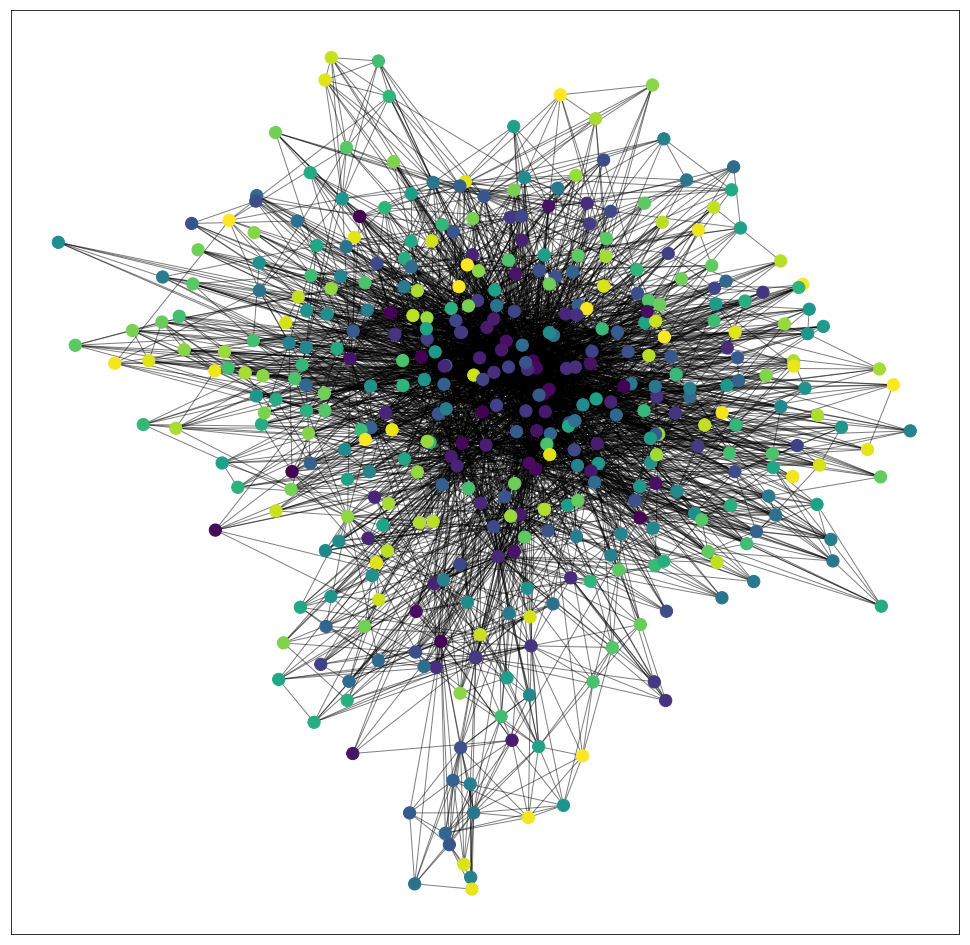

Final list of  9  louvain modularized communities :=>

[['19', '2016', '20160319', '7', '811', 'march', 'imf', 'https', 'wikileak', 'org', 'create', 'europe', 'title', 'de', 'es', 'reunion', 'marzo', 'cc', 'precedent', 'asunto', 'redact', 'teleconference', 'xx', 'gmt+1', 'mensaje', 'internal', 'agenda', 'mp3', 'ahead', 'record', 'transcript', 'th', 'link', 'page', 'official', 'worriedthattheeuisgoingtobeparalyzedinthefirsthalfof2016becauseoftheloomingbrexit', 'reenviado', 'participant', 'łdelia', 'representative', 'head', 'fear', 'description', 'audio', 'decision', 'past', 'director', 'costly', 'counterpart', 'fecha', 'para', '0221', 'attachment'], ['2', 'day', 'tomorrow', '5', '3', 'month', 'end', 'belly', 'pan', 'minute', 'year', 'zero', 'versus', 'crucial', 'instance', 'to', '30th', '1', '0', '25', '+0'], ['week', 'meeting', '2nd', 'april', 'mission', 'exactly', 'release', 'nd', 'keyword', 'progress', 'work', '6th', '8th', '9th', 'eurogroup', '7th', 'finish', '12th', '13th', 'follow

In [108]:
import community

#first compute the best partition
G = gxTerms
partition = community.best_partition(G)

comm_list = []

#drawing
plt.figure(101,(17,17))
size = float(len(set(partition.values())))
pos = nx.spring_layout(G)
count = 0.
for com in set(partition.values()) :
    count = count + 1.
    list_nodes = [nodes for nodes in partition.keys()
                                if partition[nodes] == com]
    nclr = range(len(list_nodes))
    nx.draw_networkx_nodes(G, pos, list_nodes, node_size = 150, node_color = nclr)
    print("node color: ",nclr, ". For community: ", list_nodes, "\n")
    comm_list.append(list_nodes)


nx.draw_networkx_edges(G, pos, alpha=0.5)
plt.show()

print("Final list of ", len(comm_list), " louvain modularized communities :=>\n")
print(comm_list)

Find the top entities in each community...

In [109]:
topEntInLouvModComm=[]
icx=0
for comm in comm_list:
  for item in comm:
    for ntt in final_ntt_list:
      if(ntt.lower() == item.lower()):
        entgroup = {}
        entgroup['entity'] = ntt.lower()
        entgroup['comm_id'] = icx
        topEntInLouvModComm.append(entgroup)
  icx=icx+1
      
print("\nTop Entities in each Louvain mod community :==>\n")
icx=0
for commg in topEntInLouvModComm:
  print(commg)


Top Entities in each Louvain mod community :==>

{'entity': 'imf', 'comm_id': 0}
{'entity': 'ewg', 'comm_id': 2}
{'entity': 'europeans', 'comm_id': 3}
{'entity': 'commission', 'comm_id': 3}
{'entity': 'velkouleskou', 'comm_id': 4}
{'entity': 'thomsen', 'comm_id': 4}
{'entity': 'thomas', 'comm_id': 4}
{'entity': 'wieser', 'comm_id': 4}
{'entity': 'petrova', 'comm_id': 4}
{'entity': 'greece', 'comm_id': 6}
{'entity': 'troika', 'comm_id': 6}
{'entity': 'merkel', 'comm_id': 6}
{'entity': 'sarkozy', 'comm_id': 6}
{'entity': 'dsa', 'comm_id': 6}
{'entity': 'bundestag', 'comm_id': 6}
{'entity': 'delia', 'comm_id': 7}
{'entity': 'vat', 'comm_id': 8}


Finding topics. Helps understand interaction of entities with other key terms in the origin document...hence the overall key terms - entity combo gives an idea of topics being discussed. Topics must be looked at together with the entities in the community to derive some meaning...

In [110]:
list_louv_comm = [[] for i in range(len(comm_list))]
index=0
for comm in comm_list:
  for node in comm:
    info={}
    deg = nx.degree(G,nbunch=node,weight='weight')
    info['node'] = node
    info['deg'] = deg
    list_louv_comm[index].append(info)
  index=index+1

print(list_louv_comm[0])
print(list_louv_comm[2])

comindex=0
for comminfo in list_louv_comm:
  newlist = sorted(comminfo, key=lambda k: k['deg'],reverse=True) 
  print("Top 5 artificial topics for louvain mod community: ",comindex, ". Topics: ", newlist[0]['node'], " - ",newlist[1]['node'], " - ",newlist[2]['node'],
       " - ",newlist[3]['node']," - ", newlist[4]['node'])
  comindex = comindex+1

[{'node': '19', 'deg': 266}, {'node': '2016', 'deg': 316}, {'node': '20160319', 'deg': 60}, {'node': '7', 'deg': 20}, {'node': '811', 'deg': 98}, {'node': 'march', 'deg': 224}, {'node': 'imf', 'deg': 860}, {'node': 'https', 'deg': 60}, {'node': 'wikileak', 'deg': 218}, {'node': 'org', 'deg': 98}, {'node': 'create', 'deg': 72}, {'node': 'europe', 'deg': 170}, {'node': 'title', 'deg': 106}, {'node': 'de', 'deg': 416}, {'node': 'es', 'deg': 120}, {'node': 'reunion', 'deg': 72}, {'node': 'marzo', 'deg': 158}, {'node': 'cc', 'deg': 60}, {'node': 'precedent', 'deg': 52}, {'node': 'asunto', 'deg': 40}, {'node': 'redact', 'deg': 318}, {'node': 'teleconference', 'deg': 144}, {'node': 'xx', 'deg': 212}, {'node': 'gmt+1', 'deg': 60}, {'node': 'mensaje', 'deg': 60}, {'node': 'internal', 'deg': 146}, {'node': 'agenda', 'deg': 60}, {'node': 'mp3', 'deg': 86}, {'node': 'ahead', 'deg': 40}, {'node': 'record', 'deg': 40}, {'node': 'transcript', 'deg': 92}, {'node': 'th', 'deg': 20}, {'node': 'link', 'd

### K Clique communities

See [here](http://hal.elte.hu/cfinder/wiki/papers/communitylettm.pdf). It interprets the global organisation of networks as the coexistence of their structural sub-units (communities) associated with more highly interconnected parts.

In [122]:
from networkx.algorithms.community import kclique
list_comm_kc=[]
for i in range(2,15):
  p = list(kclique.k_clique_communities(G, k=i,cliques=nx.find_cliques(G)))
  print("\nFor k=",i, ". ", len(p), " communities found. Communities are: ===>",)
  #print(p)
  list_comm_kc.append(p)
  for comm in p:
    print(comm)


For k= 2 .  1  communities found. Communities are: ===>
frozenset({'small', 'point', 'washington', 'tax', 'definition', 'xx', '25', 'marzo', 'think', 'bundestag', 'relief', 'loosely', 'łpoul', 'troika', 'delia', '2nd', 'asunto', 'mickey', 'negotiation', 'possible', 'correct', 'th', 'criterion', 'understand', 'fine', 'don', 'essentially', 'counterpart', 'march', 'opposition', '15th', 'need', 'bill', '0221', 'minute', 'undecided', 'participant', 'solution', 'july', '0', 'page', 'sure', 'de', 'board', 'happen', 'dsa', 'minimum', 'haha', 'decide', 'paul', 'dijsselbloem', 'fully', 'german', 'time', 'leader', 'clearly', 'management', '11th', 'actually', '16th', 'let', 'manage', '2016', 'reform', 'mouse', 'member', 'nee', 'try', 'concerned', 'strategy', 'supplementary', 'specific', 'merkel', 'feel', 'document', 'ahead', 'acusation', 'day', 'force', '19', 'mensaje', 'audio', 't', 'week', 'table', 'velkouleskou', 'directly', 'simple', 'european', 'disbursement', 'open', 'low', 'fecha', 'discus

### Fluidic Communities:

Can find variable communities per inputs. Generated randomly so o/p is different everytime. Use the seed to get results that can be duplicated across runs. Use this to find communities and provide insights into the graph structure at different levels of granularity by varying communities generated. FluidC allows for the definition of the number of communities to be found, simply by initializing a different number of fluids in the graph. This is a desirable property for data analytics, as it enables the study of the graph and its entities at several levels of granularity. Another interesting feature of FluidC is that it avoids the creation of monster communities in a non-parametric manner. FluidC is designed for connected, undirected, unweighted graphs (ignores weights - so keep this in mind).

In [112]:
from networkx.algorithms.community import asyn_fluid

fluidic_comm = list(asyn_fluid.asyn_fluidc(G,10,max_iter=1500, seed=1013))

for comm in fluidic_comm:
  print(comm)

{'department', 'nofi', 'representative', 'inside', 'title', 'status', 'apparently', 'exit', 'send', 'keyword', 'łpoul', 'nd', 'precedent', 'create', '2016', 'director', 'europe', 'teleconference', 'ball', 'greece', 'counterpart', 'explicit', 'play', 'march', 'mensaje', 'release', 'set', 'imftms', 'mission', 'fear', 'lean', 'european', 'union', 'łiva', 'head'}
{'sustainability', 'dsa', 'default', 'past', 'point', 'question', 'medium', 'leave', 'lower', 'bring', 'add', 'definition', 'pitch', 'mean', 'hard', 'analysis', 'time', 'huge', 'term', 'financing', 'thomsen', 'know', 'go', 'delia', 'suggest', 'matter', 'concerned', 'purpose', 'stage', 'feel', 'don', 'money', 'differently', 'evolve', 'decision', 'avoid', 'run', 'europeans', 'contingent', 'program', 'yes', 'proceed', 'seriously', 'pressure', 'brussel', 'finance'}
{'spacing', 'base', 'paul', '30th', '25', 'versus', 'belly', 'permeate', 'let', 'space', 'year', '3', 'member', 'instance', 'turn', 'sink', 'zero', '+0', 'stick', 'state', 

## For a particular group or cluster, identify the key target entities for processing / managing the group or cluster in a certain way.

For e.g., if we are analysing an extremist group, we would like to know which entities to target to, say, break that group apart. Or if we are analysing a molecular structure of a virus, we would like to know where there are structural weakness to exploit. If we're analysing a community / locality in a city for a logisitics provider, we may want to know the most optimal locations for situating warehouses / supply points. There are many more use cases that fit here - I've just mentioned a few...

For that particular group, find nodes with better centrality scores and target them...We can take the louvain mod group and find centralities for the members...and then mark the nodes/ntt's with higher cent scores as possible targets. Centrality scores we shall evaluate would be betweenness and closeness centralities. In a connected graph, closeness centrality (or closeness) of a node is a measure of centrality in a network, calculated as the reciprocal of the sum of the length of the shortest paths between the node and all other nodes in the graph. Thus, the more central a node is, the closer it is to all other nodes.

In [137]:
from networkx.algorithms.centrality import closeness_centrality

def get_node_closeness_cent(node):
  return (closeness_centrality(gxTerms, u=node, distance='weight', wf_improved=True))

list_louv_comm_closcent = [[] for i in range(len(comm_list))]
index=0
for comm in comm_list: #use the louvain mod comm list we had calculated above
  for node in comm:
    info={}
    deg = get_node_closeness_cent(node)
    info['node'] = node
    info['deg'] = deg
    list_louv_comm_closcent[index].append(info)
  index=index+1

#now let's do the same but use eigen vector centrality measures...
eigen_betcen_nodes = nx.eigenvector_centrality(gxTerms, max_iter=350, tol=1e-06, nstart=None, weight='weight')

def get_node_eigenvect_cent(node):
  for k,v in eigen_betcen_nodes.items():
    if(k == node):
      return v

list_louv_comm_eigveccent = [[] for i in range(len(comm_list))]
index=0
for comm in comm_list:
  for node in comm:
    info={}
    deg = get_node_eigenvect_cent(node)
    info['node'] = node
    info['deg'] = deg
    list_louv_comm_eigveccent[index].append(info)
  index=index+1

from operator import itemgetter
print('\n\n================  These Entities should be targeted  ================\n')
#finding entities
for list1 in list_louv_comm_eigveccent:
  newlist = sorted(list1, key=itemgetter('deg'),reverse=True)
  print('For Louvain Mod Group: ', list1)
  for item in newlist:
    for ntt in final_ntt_list:
      if(ntt.lower() == item['node']):
        print('Top entities to target (Eigenvec centrality): ',item['node'], '  -  ',item['deg'])
        
for list1 in list_louv_comm_closcent:
  newlist = sorted(list1, key=itemgetter('deg'),reverse=True)
  print('For Louvain Mod Group: ', list1)
  for item in newlist:
    for ntt in final_ntt_list:
      if(ntt.lower() == item['node']):
        print('Top entities to target (Closeness centrality): ',item['node'], '  -  ',item['deg'])

#we're trying to see which other terms may be important apart from the entities themselves...
print('\n\n================  These nodes should be targeted  ================\n')
#now find the max values for both closeness and eigenvec with node names
for list1 in list_louv_comm_eigveccent:
  ix = max(range(len(list1)), key=lambda index: list1[index]['deg'])
  print('For Louvain Mod Group: ', list1)
  print('Max eigenveccent scoring node: ',list1[ix]['node'], '  -  ',list1[ix]['deg'])
  
print('\n\n')
  
for list1 in list_louv_comm_closcent:
  ix = max(range(len(list1)), key=lambda index: list1[index]['deg'])
  print('For Louvain Mod Group: ', list1)
  print('Max closecent scoring node: ',list1[ix]['node'], '  -  ',list1[ix]['deg'])



================  These Entities should be targeted  ================

For Louvain Mod Group:  [{'node': '19', 'deg': 0.0035128267947170853}, {'node': '2016', 'deg': 0.004859630383344251}, {'node': '20160319', 'deg': 0.002521339995122137}, {'node': '7', 'deg': 0.00014670605189807674}, {'node': '811', 'deg': 0.0003066049429678147}, {'node': 'march', 'deg': 0.005255078611167911}, {'node': 'imf', 'deg': 0.030953493547272032}, {'node': 'https', 'deg': 0.0013826766441116369}, {'node': 'wikileak', 'deg': 0.004838004410053013}, {'node': 'org', 'deg': 0.0024454904604948396}, {'node': 'create', 'deg': 0.0005283546689666781}, {'node': 'europe', 'deg': 0.010652109576030425}, {'node': 'title', 'deg': 0.001061547687519965}, {'node': 'de', 'deg': 0.0010627990353337237}, {'node': 'es', 'deg': 7.214967981730826e-05}, {'node': 'reunion', 'deg': 0.00010291103400810042}, {'node': 'marzo', 'deg': 0.00031271824464556056}, {'node': 'cc', 'deg': 6.0247502897026005e-05}, {'node': 'precedent', 'deg': 0.00046

## How may the extracted groups evolve?

We're trying to find the various paths of connection and relations amongst the members of the group, more specifically, how new connections may be forged. This is useful to figure out what the group may look like in the future and hence aid in decision making now...

We use [Link Prediction](http://be.amazd.com/link-prediction/)...

### Adamic Adar

A value of 0 indicates that two nodes are not close, while higher values indicate nodes are closer. The result is based on all all non-existent edges in the graph. Thus, the sorted results tell us which new edges have a higher chance of being formed in the future...

In [168]:
from networkx.algorithms.link_prediction import adamic_adar_index
from operator import itemgetter

aa_list = list(adamic_adar_index(G,ebunch=None))
print("Edges found: ", len(aa_list))

i=0
for aainfo in sorted(aa_list,key=itemgetter(2),reverse=True):
  if(i==200):
    break
  for ntt in final_ntt_list:
    if(aainfo[0].lower() == ntt.lower or aainfo[1].lower() == ntt.lower()):
      print(aainfo)
  i=i+1

Edges found:  77256
('agreement', 'thomsen', 9.234281315690687)
('day', 'velkouleskou', 7.661560676579359)
('troika', 'thomsen', 6.600567291142123)
('tax', 'thomsen', 5.449859093271278)
('t', 'imf', 5.378080975203778)
('decision', 'thomsen', 5.194787155812049)
('low', 'thomsen', 5.168969768022517)
('don', 'imf', 5.123746197059735)
('know', 'imf', 4.73652111597779)
('yeah', 'imf', 4.695229941421251)
('issue', 'thomsen', 4.575189931395817)
('guy', 'thomsen', 4.479943936821042)
('agree', 'imf', 4.445062270900027)
('need', 'imf', 4.438044349798612)
('yes', 'commission', 4.432358585326114)
('possible', 'velkouleskou', 4.4243083276049475)
('exactly', 'thomsen', 4.293205430235476)
('2', 'greece', 4.285524339352719)
('think', 'troika', 4.251959394817803)


### Preferential attachment

Compute closeness of nodes based on their shared neighbors. Preferential attachment means that the more connected a node is, the more likely it is to receive new links. A value of 0 indicates that two nodes are not close, while higher values indicate that nodes are closer.

When ebunch = None, all non-existent edges are computed.

In [182]:
from networkx.algorithms.link_prediction import preferential_attachment

pref_attach_list_all = list(preferential_attachment(G, ebunch=None))
#print("\nSorted predicted links: \n",sorted(pref_attach_list_all, key=lambda x: x[2], reverse=True))
print("Edges found: ", len(pref_attach_list_all))

i=0
for aainfo in sorted(pref_attach_list_all,key=itemgetter(2),reverse=True):
  if(i==100):
    break
  for ntt in final_ntt_list:
    if(aainfo[0].lower() == ntt.lower or aainfo[1].lower() == ntt.lower()):
      print(aainfo)
  i=i+1

Edges found:  77256
('t', 'imf', 10648)
('don', 'imf', 9064)
('agreement', 'thomsen', 8722)
('need', 'imf', 8536)
('merkel', 'velkouleskou', 8366)
('know', 'imf', 8360)
('day', 'velkouleskou', 8010)
('agree', 'imf', 7568)
('troika', 'thomsen', 7476)
('right', 'imf', 7128)
('t', 'greece', 7018)
('week', 'thomsen', 6764)
('yeah', 'imf', 6600)
('issue', 'thomsen', 6052)
('mean', 'imf', 5720)
('tax', 'thomsen', 5696)
('19', 'thomsen', 5696)
('know', 'greece', 5510)
('discussion', 'imf', 5192)
('income', 'thomsen', 5162)
('target', 'imf', 5104)
('t', 'troika', 5082)
('decision', 'thomsen', 4984)


## What are the typical information flow paths through the network?

We are trying to figure out which entities are typically involved in what paths for disseminating information. This helps us understand how various entities exchange information..

For the top n central nodes find the best paths. Use centrality measures to id top n ntt's and see if path finding algos can compute low resistance paths between them. Should also independently find low resistance paths and see which entities lie on it. Ideally, we should use multiple centrality measures but in this case we'll use closeness centrality, find top 5 nodes and compute 'best' paths between them.

I've written a simple mod of the shortest path algorithm called shortest-path-heavy. It's main goal is to find the best paths for such a network. In a nutshell, this algorithm computes the simplest shortest path combinations possible between two nodes of interest and then chooses the one with maximum weights.

{'19': 0.28480565371024735, '2': 0.31361867704280155, '2016': 0.26866666666666666, '20160319': 0.23608670181605154, '7': 0.2410287081339713, '811': 0.20302267002518892, 'week': 0.3041509433962264, 'day': 0.2856130403968816, 'europeans': 0.2514036182158453, 'explicit': 0.2481527093596059, 'greek': 0.29351784413692644, 'need': 0.2958883994126285, 'march': 0.2623697916666667, 'imf': 0.2922407541696882, 'meeting': 0.30976172175249805, 'https': 0.23959571938168847, 'wikileak': 0.22326869806094182, 'org': 0.24131736526946107, 'create': 0.24907292954264523, 'europe': 0.21033402922755742, 'title': 0.2433574879227053, 'de': 0.17259100642398287, 'es': 0.22729836435420192, 'reunion': 0.16509627201966406, 'marzo': 0.18726765799256506, 'cc': 0.195821185617104, 'date': 0.30142109199700823, 'exit': 0.25717932354818124, 'velkouleskou': 0.3281758957654723, 'yeah': 0.29502196193265007, 'precedent': 0.2653061224489796, 'asunto': 0.22376457523598, 'redact': 0.24439053972104305, 'tomorrow': 0.2140201805629

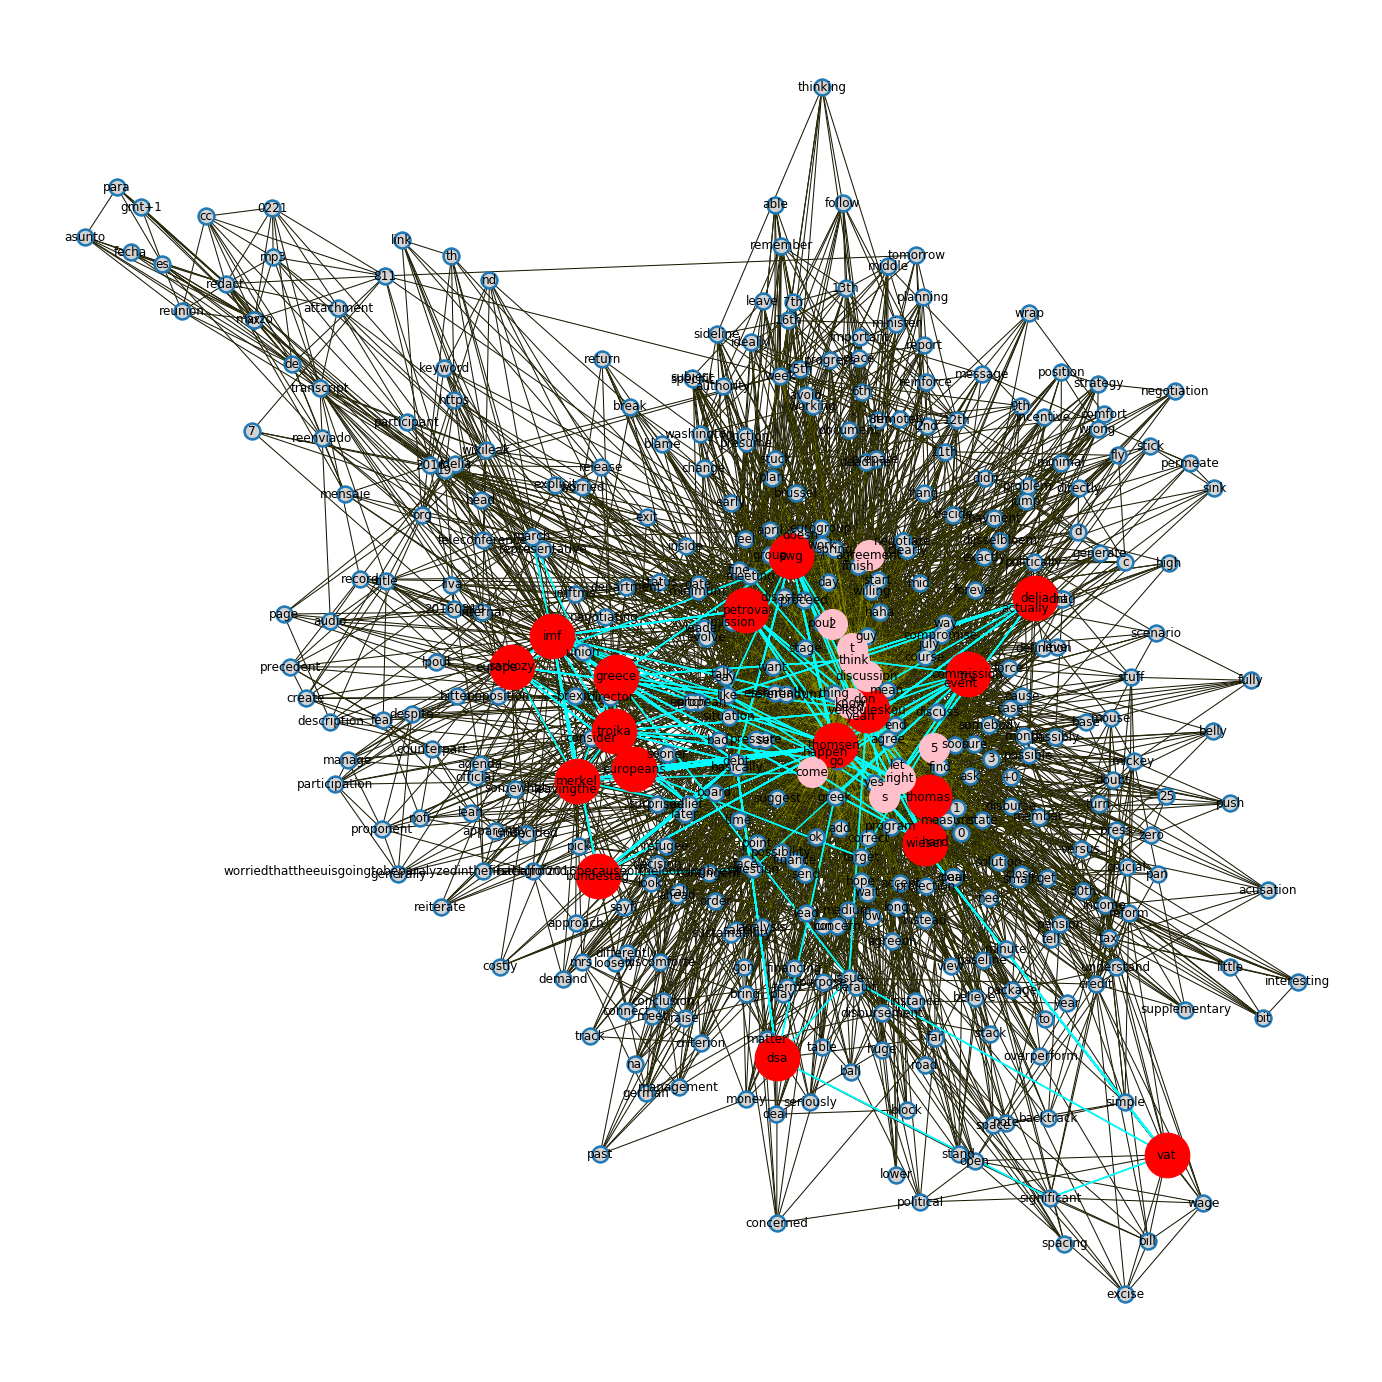

In [201]:
#find top 5 nodes by closeness centrality. See how many of them are ntt's
all_nodes = nx.nodes(gxTerms)

dict_closeness_centrality = {}

for node in all_nodes:
  dict_closeness_centrality.update({node: closeness_centrality(gxTerms, u=node, distance='weight', wf_improved=True)})

print(dict_closeness_centrality)
print(len(dict_closeness_centrality))

sorted_dict_closeness_centrality = sorted(dict_closeness_centrality.items(),key= lambda x: x[1],reverse=True)
print(sorted_dict_closeness_centrality)

#plot the graph
pos = forceatlas2_layout(gxTerms, linlog=False, nohubs=False,iterations=100)

topnttnodes=[]
final_ntt_list_lower = [item.lower() for item in final_ntt_list]
for node in sorted_dict_closeness_centrality:
  if(node[0].lower() in final_ntt_list_lower):
    topnttnodes.append(node[0].lower())

#other imp non ntt nodes
index=0
topnonnttnodes=[]
for node in sorted_dict_closeness_centrality:
  if(node[0].lower() not in final_ntt_list_lower):
    topnonnttnodes.append(node[0].lower())
    index = index+1
    if(index==10):
      break

print('top ntts: ',topnttnodes)
print('top non ntts: ',topnonnttnodes)

plt.figure(304, (19,19))

nx.draw(gxTerms, pos,with_labels=True)
nx.draw_networkx_nodes(gxTerms,pos,nodelist=all_nodes,node_color='lightgrey',node_size=150,alpha=1)
nx.draw_networkx_nodes(gxTerms,pos,nodelist=topnttnodes,node_color='red',node_size=2000,alpha=1)
nx.draw_networkx_nodes(gxTerms,pos,nodelist=topnonnttnodes,node_color='pink',node_size=900,alpha=1)
nx.draw_networkx_edges(gxTerms, pos, width=0.15, edge_color='yellow', style='dashdot', alpha=0.75)

#now find 'best' paths between each of these ntts and also draw them on the same graph
from networkx.algorithms import simple_paths

'''
Note - typically, min weights are desired. But in our graph the weight represents co-occurence frequency and hence larger weights indicate that the two nodes
are more closer. Therefore for us, the best path is with max weight.
So, What are we trying to do below? - the logic is to achieve a goal like such: we want to find the shortest path with maximum weight between nodes of our 
interest. Why max wt? - In our case, the edge weights connecting nodes represent the co occurence of the two nodes within the original text document. Closer
two nodes are, the better they can exchange information. Since we want to find which nodes and paths spread info better through the nw, we are applying that
reasoning. We run this only for a few nodes of interest (typically ntt's). However we can run it for the whole graph to find other alternates too...

get_best_path is an implementation of shortest-path-heavy. The implementation is not optimised so it may run very slowly for very large or very dense graphs.
In such a case, restrict the loops in the algorithm.
'''

def get_best_path(source,target):
  for i in range(1,50):#@todo - what is the max value of i? How will it affect the fn runtime below?
    sp = list(simple_paths.all_simple_paths(gxTerms, source, target, cutoff=i))
    #print('Length of sp: ', len(sp))
    if(len(sp)>0):
      #print('All simple paths: ', sp)
      edge_data_list = []
      for x in range(0,len(sp)):
        print('Assessing path: ',sp[x], ' at x=',x)
        #print('sp[x][0]: ',sp[x][1])
        print('len(spx):', len(sp[x]))
        #print(edge_data)
        for y in range(0,len(sp[x])-1):
          print('getting paths between: ', sp[x][y], ' and ', sp[x][y+1])
          edge_data = gxTerms.get_edge_data(sp[x][y],sp[x][y+1])
          if(edge_data):
            edge_data_dict={}
            edge_data_dict['node'] = sp[x]
            edge_data_dict['w'] = edge_data['weight']
            edge_data_list.append(edge_data_dict)
          else:
            print('no w') #no path found. @todo - what to do in this case?
      break
    
  #print("Weighted paths for our nodes: ",edge_data_list)
  return edge_data_list

for ntt in topnttnodes:
  l1 = []
  l1.append(ntt)
  lres = [item for item in topnttnodes if item not in l1]
  for n in lres:
    path = get_best_path(source=ntt, target=n)
    print("recv path: ", path)
    newpath = sorted(path, key=lambda k: k['w'], reverse=True)
    print("sorted recv path: ", newpath)
    print("shortest heavy path: ", newpath[0], ' and actual path: ', newpath[0]['node'])
    nx.draw_networkx_edges(gxTerms, pos, edgelist=tuple(zip(newpath[0]['node'],newpath[0]['node'][1:])), 
                           width=1.5, edge_color='cyan', style='solid', alpha=1.0)

plt.savefig('foo.png',bbox_inches='tight')
plt.show()

In [0]:
from google.colab import files

files.download('foo.png')